In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [3]:
from pandas import DataFrame 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib.font_manager import FontProperties 

font = FontProperties(fname="/home/gezi/soft/simsunttc/msyh.ttf", size=12)  #size可不用指定

In [4]:
from IPython.display import Image

In [5]:
import gezi
from libgezi import utf82gbk, gbk2utf8

In [6]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS
 
flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/lijiaoshou/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model/bow.bak/epoch/model.cpkt-10-12750', '')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/lijiaoshou/model.v0/bow.basic/', '')

#flags.DEFINE_string('vocab', '/home/gezi/new/temp/image-caption/keyword/tfrecord/seq-basic/vocab.txt', 'vocabulary file')
#flags.DEFINE_string('model_dir', '/home/gezi/new/temp/image-caption/keyword/model/rnn.lijiaoshou2/', '')

flags.DEFINE_string('seg_method_', 'basic', '')
flags.DEFINE_bool('feed_single_', True, '')

import gezi
import melt 
from deepiu.util import text2ids

import numpy as np

text2ids.init(FLAGS.vocab)

predictor = melt.Predictor(FLAGS.model_dir)

def predict(text, text2=None, topn=0):
  text = utf82gbk(text)
  timer = gezi.Timer()
  text_ids = text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, max_words=50)
  #print('text_ids', text_ids)
  
  if topn:
    #print(tf.get_default_graph().get_all_collection_keys())
    vocab = text2ids.vocab
    scores = predictor.inference('text_words_score', feed_dict = {'bow/main/text:0': [text_ids]})
    #print(scores)
    scores = scores[0]
    indexes = (-scores).argsort()[:topn]
    print(' '.join(['%s:%.6f'%(gbk2utf8(vocab.key(index)), scores[index]) for index in indexes]))
    return
    
  if text2 is not None:
    text2 = utf82gbk(text2)
    text2_ids = text2ids.text2ids(text2, FLAGS.seg_method_, feed_single=True)
    score = predictor.inference(['textsim'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids],
                                      'bow/main/text2:0': [text2_ids]
                                      })
    print(score[0][0])
    return score[0][0]

  #print('words', words)
  argmax_encode = predictor.inference(['words_importance'], 
                                    feed_dict= {
                                      'bow/main/text:0': [text_ids]
                                      })
  print('argmax_encode', argmax_encode[0])

  argmax_encode = argmax_encode[0][0]
  argmax_encode = [max(x, 0) for x in argmax_encode]

  text_ids =  text2ids.text2ids(text, FLAGS.seg_method_, feed_single=FLAGS.feed_single_, append_start=False, append_end=False)
  words = text2ids.ids2words(text_ids)
    
  words = [gbk2utf8(x) for x in words]

  seq_len = 0
  for x in words:
  	if x != 0:
  		seq_len += 1
  	else:
  		break

  print(text_ids)

   # visualize model
  import matplotlib.pyplot as plt
  #argmaxs = [np.sum((argmax_encode==k)) for k in range(seq_len)]
  argmaxs = argmax_encode[:seq_len]
  print('argmaxs', argmaxs, np.sum(argmaxs), seq_len)
  x = range(len(argmaxs))
  total = sum([x for x in argmaxs if x > 0])
  y = [100.0*n/total for n in argmaxs]
  #print(words, y)
  print(gbk2utf8(text))
  
  #for word, score in zip(words, y):
  #  print(word, score)
  
  fig = plt.figure()
  
  #words = [x.decode('utf8') for x in words]
  #words = [i for i in range(len(words))]

  #plt.xticks(x, words, rotation=45)
  #plt.bar(x, y)
  #plt.ylabel('%')
  #plt.title('Visualisation of words importance')

  df = DataFrame({"%":y}, index=words) 
  ax = df.plot(kind = 'bar', rot = 90) 
  labels = [label.decode("utf-8") for label in df.index.values] 
  ax.set_xticklabels(labels, fontproperties=font) 
    
  #zhfont1 = matplotlib.font_manager.FontProperties(fname='/home/gezi/soft/simsunttc/msyh.ttf')
  #plt.xlabel('性别',fontproperties=zhfont1)
  #plt.ylabel('人数',fontproperties=zhfont1)
  #plt.xticks( (0,1),('男','女') ,fontproperties=zhfont1)
  #plt.bar(left=(0,1), height=(1,0.5), width=0.35)
  
  plt.title('Visualisation of words importance')
  #plt.title('句子词汇重要度')
  plt.show()

tensorflow_version: 1.2.0-rc0
ENCODE_UNK 1
restore from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/model.ckpt-138.0-176000


INFO:tensorflow:Restoring parameters from /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/model.ckpt-138.0-176000


import graph ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/model.ckpt-138.0-176000.meta
restore ok /home/gezi/new/temp/image-caption/lijiaoshou/model/bow.basic.5neg/model.ckpt-138.0-176000


In [7]:
def top_words(text, topn=100):
  return predict(text, topn=topn)

In [8]:
top_words('高铁')
top_words('美女')

铁:0.900904 温婉:0.379292 高:0.376333 海鹏:0.311692 亚澳:0.304882 母猪:0.295337 至爱:0.283798 接送:0.281343 腐朽:0.276400 先尝:0.275969 卷板:0.274183 水木:0.269862 换热:0.269337 砌筑:0.266455 牧业:0.266441 冶:0.266345 舞龙:0.266152 诚鑫:0.265902 联大:0.261178 水刀:0.260553 养猪:0.260398 傍:0.254424 羊:0.253928 卤菜:0.252984 楼盖:0.252435 披风:0.251833 犹在:0.249486 苍:0.248201 暖阳:0.246683 斜:0.245968 励志:0.245256 瑞克:0.244912 奂:0.244840 倒角:0.244656 犀利:0.244138 新低:0.243534 古色:0.243533 笼:0.242981 中水:0.242307 加力:0.241893 06:0.241482 海涛:0.240684 高邑:0.240505 试一试:0.240414 敦:0.240407 虚弱:0.240213 卡顿:0.239590 兴隆:0.239498 享誉:0.239186 理解:0.238972 随处:0.238417 切割:0.238390 东蒙:0.238287 计划:0.238249 给予:0.237859 公墓:0.237753 成活:0.237679 栅:0.237579 两三百:0.237491 食堂:0.237335 价低:0.237314 开班:0.236036 冬暖:0.236015 42:0.235424 告知:0.234899 威力:0.234137 便民:0.234071 椿:0.233873 猪:0.233678 紫穗:0.233539 桂花:0.233309 大叫:0.233270 万隆:0.233030 财源:0.232878 减半:0.232364 绝望:0.232077 万家福:0.231730 猪舍:0.231509 肉干:0.231404 腾达:0.231026 波形:0.230793 乖乖:0.230168 泰隆:0.229852 缆索:0.229719 马代

In [9]:
top_words('墨镜')

墨镜:1.000000 偏光:0.532687 镜框:0.478505 眼镜:0.476445 家乡:0.449100 古风:0.445307 太忙:0.405961 一两百:0.357591 镜架:0.347108 芦:0.342586 敦煌:0.328110 全身:0.327330 滑:0.319560 副:0.312256 血统:0.306910 连续:0.302917 目:0.301623 碧仁:0.301502 羟丙:0.299056 地域:0.298805 爱好:0.296614 仅剩:0.294668 久经:0.293770 喵喵:0.290278 要靠:0.288430 喷油:0.288227 重演:0.286462 加剧:0.286122 着手:0.285661 繁育:0.284957 奕:0.284550 棒球:0.283722 袋鼠:0.280320 色调:0.279337 足银:0.279307 母粒:0.278051 嘉峪:0.277997 “:0.276843 钙镁:0.275500 镜:0.274414 利弊:0.273131 校车:0.272950 舱:0.272003 色母:0.271287 际:0.270493 12w:0.269553 f1:0.268933 获利:0.267450 碳酸铜:0.267161 特性:0.266948 钢圈:0.266690 燕窝:0.265935 剂:0.265406 名气:0.265028 合叶:0.263907 花都:0.263870 粉条:0.263592 科隆:0.262459 新贵:0.262119 都灵:0.262109 求真:0.261886 诺力:0.261156 以免:0.260989 世联:0.260015 膨胀:0.258513 腥味:0.258263 voc:0.257355 玛瑞莎:0.256216 好滋味:0.255479 圣兽:0.255204 听话:0.254647 欠款:0.253765 美高:0.252637 石英:0.252425 再见:0.252258 兵:0.251542 新山:0.250876 鹏达:0.250592 瑞鑫:0.250450 催乳:0.250367 哈:0.250102 行:0.249204 纶:0.248661 秘术:0.248642 

In [10]:
predict('美女', '美女')
predict('帅哥戴墨镜', '帅哥')
predict('帅哥戴墨镜', '墨镜')

[ 1.00000012]
[ 0.46290413]
[ 0.43352127]


array([ 0.43352127], dtype=float32)

argmax_encode [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[1311, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [1.0] 1.0 1
美女


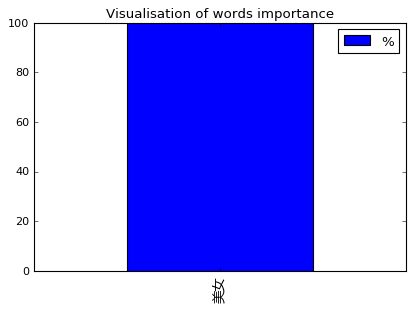

argmax_encode [[ 0.4629041   0.7209217   0.43352133  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[6829, 1355, 12429, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.4629041, 0.7209217, 0.43352133] 1.61735 3
帅哥戴墨镜


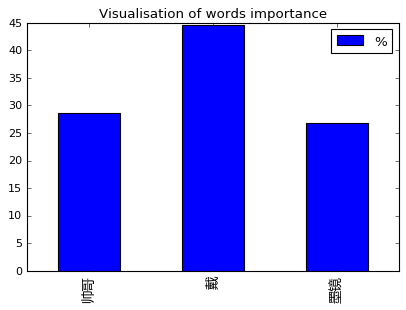

argmax_encode [[ 0.23544471  0.36029446 -0.00450225  0.11185768  0.17979181  0.24623655
   0.09848154  0.11311796  0.22805957  0.09848154  0.32035005  0.02940884
   0.09848154  0.13414726  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[3935, 640, 5, 80, 1321, 508, 3, 34, 269, 3, 2239, 25, 3, 1407, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.23544471, 0.36029446, 0, 0.11185768, 0.17979181, 0.24623655, 0.098481536, 0.11311796, 0.22805957, 0.098481536, 0.32035005, 0.02940884, 0.098481536, 0.13414726] 2.25415350311 14
初中孩子的免费精品课，用手机，在家上，省心


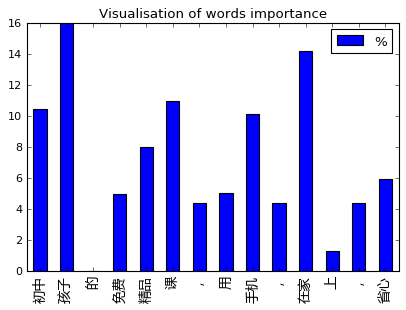

argmax_encode [[ 0.15963334  0.11406408  0.25470358  0.11040571  0.0502534   0.21278253
   0.04630607  0.18366233  0.03268153  0.17979975  0.35448226  0.06719905
   0.23562068  0.21278253  0.21263936  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[17, 34, 1393, 324, 29, 199, 41, 7663, 3, 993, 269, 712, 56, 199, 1362, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.15963334, 0.11406408, 0.25470358, 0.11040571, 0.050253399, 0.21278253, 0.046306074, 0.18366233, 0.032681528, 0.17979975, 0.35448226, 0.067199051, 0.23562068, 0.21278253, 0.21263936] 2.42702 15
好用颜值高才是王道，这些手机现在买才实惠


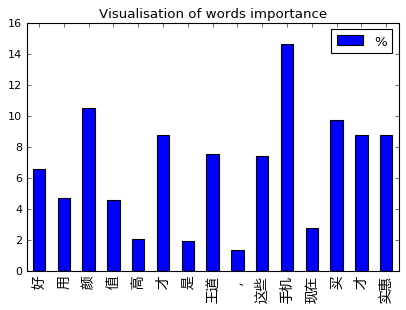

In [11]:
predict('美女')
predict('帅哥戴墨镜')
predict('初中孩子的免费精品课，用手机，在家上，省心')
predict('好用颜值高才是王道，这些手机现在买才实惠')

argmax_encode [[ 0.04344424  0.15282343  0.17153645  0.13677418 -0.05230915  0.21668616
   0.12455538  0.05503981  0.16061983  0.09721873  0.18295324  0.12209368
   0.10562436  0.02881208  0.23828316  0.08346622  0.14331511  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[243, 350, 116, 1598, 135, 1401, 6, 18, 1208, 200, 878, 402, 365, 43, 579, 46, 428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.043444242, 0.15282343, 0.17153645, 0.13677418, 0, 0.21668616, 0.12455538, 0.055039808, 0.16061983, 0.09721873, 0.18295324, 0.12209368, 0.10562436, 0.028812077, 0.23828316, 0.083466224, 0.14331511] 2.06324604899 17


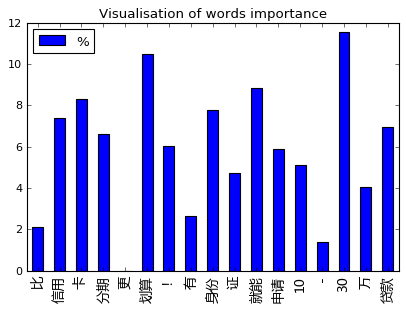

argmax_encode [[ 0.29404753  0.06937146  0.25292021  0.3233791   0.2985861   0.04208184
   0.19707136  0.17949623  0.25479558  0.0860396  -0.00960048  0.16608068
   0.24717721  0.04711675  0.20025358  0.16806313  0.23283304  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4, 16, 4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.29404753, 0.069371462, 0.25292021, 0.3233791, 0.2985861, 0.04208184, 0.19707136, 0.17949623, 0.25479558, 0.086039603, 0, 0.16608068, 0.24717721, 0.047116749, 0.20025358, 0.16806313, 0.23283304] 3.05931341648 17
1890元往返飞旧

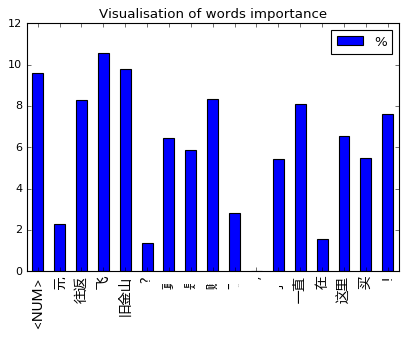

argmax_encode [[ 0.08553385  0.04489264  0.12299612  0.13669816  0.21717313  0.20318763
   0.47036797  0.05475801  0.20109941  0.27233818  0.27809656 -0.02562621
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[14, 199, 41, 976, 620, 100, 844, 5, 3709, 4480, 2260, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.08553385, 0.044892643, 0.12299612, 0.13669816, 0.21717313, 0.20318763, 0.47036797, 0.054758012, 0.20109941, 0.27233818, 0.27809656, 0] 2.08714165911 12
这才是上班族修本科的正确打开方式！


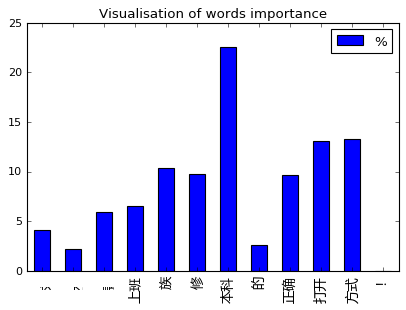

In [12]:
predict('比信用卡分期更划算！有身份证就能申请10-30万贷款')
predict('1890元往返飞旧金山?真是赚了,我一直在这里买!')
predict('这才是上班族修本科的正确打开方式！')

argmax_encode [[ 0.06918113  0.10970808  0.15681061  0.15569088  0.02774321  0.31505859
   0.32225868  0.13051009 -0.03299151  0.11112042  0.39603722  0.22592841
   0.07247956  0.2382997   0.15243062  0.20196328  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[19589, 36, 737, 8, 74, 626, 852, 245, 7, 993, 5404, 340, 12, 9771, 12322, 6140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.069181129, 0.10970808, 0.15681061, 0.15569088, 0.027743211, 0.31505859, 0.32225868, 0.13051009, 0, 0.11112042, 0.39603722, 0.22592841, 0.072479561, 0.2382997, 0.15243062, 0.20196328] 2.6852204781 16
国庆到成都不要住酒店啦,这些民

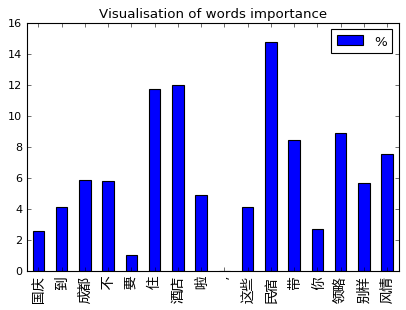

argmax_encode [[ 0.52136731  0.15452668  0.12672825  0.06564707  0.07107881  0.22145531
   0.52136731  0.1982294   0.31520572  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8145, 39, 269, 133, 8, 256, 8145, 33, 478, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.52136731, 0.15452668, 0.12672825, 0.065647066, 0.071078807, 0.22145531, 0.52136731, 0.1982294, 0.31520572] 2.19561 9
低头玩手机?不如低头学英语


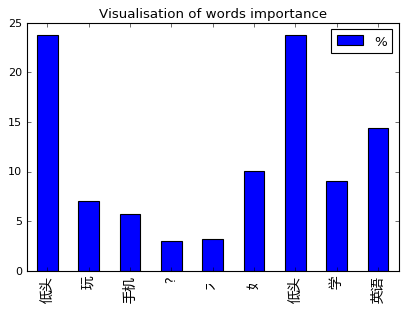

argmax_encode [[ 0.18554024  0.05343873  0.16682518  0.41340202  0.03169626  0.04815013
  -0.00369896  0.34357214  0.04611028  0.15122443  0.16542453  0.06604249
   0.05343873  0.06074198  0.11993949  0.03442251  0.04605406  0.1373338
   0.09103583  0.12915654  0.17187983  0.17325835  0.15122443  0.10369927
   0.17571731 -0.01150152  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]]
[6829, 6, 1277, 2671, 15, 59, 341, 2532, 87, 18, 400, 529, 6, 49, 378, 78, 58, 172, 21, 3697, 5718, 542, 18, 1262, 2511, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.18554024, 0.053438731, 0.16682518, 0.41340202, 0.031696256, 0.04815013, 0, 0.34357214, 0.04611028, 0.15122443, 0.16542453, 0.06604249, 0.053438731, 0.060741983, 0.11993949, 0.034422509,

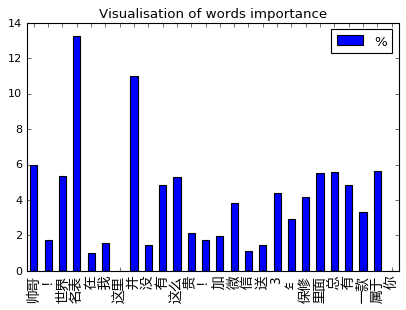

argmax_encode [[ 0.12309003  0.39853519  0.08785571  0.0679088   0.08785571  0.5321427
   0.07267182  0.09167798  0.2747077  -0.03542462  0.03856829  0.31882647
   0.02735499 -0.00632275  0.0068944   0.5321427  -0.03662772  0.17824432
   0.15207624  0.26461661  0.2747077   0.0225317   0.02873119  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2520, 1741, 11, 218, 11, 478, 2583, 885, 508, 7, 136, 640, 3755, 279, 25, 478, 20, 4884, 16, 1777, 508, 80, 865, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.12309003, 0.39853519, 0.087855712, 0.067908801, 0.087855712, 0.5321427, 0.072671816, 0.091677979, 0.2747077, 0, 0.038568288, 0.31882647, 0.027354989, 0, 0.0068943985, 0.5321427, 0, 0.17824432, 0.

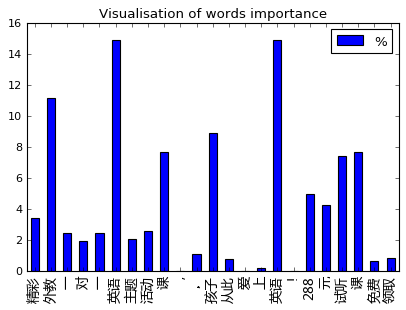

In [13]:
predict('国庆到成都不要住酒店啦,这些民宿带你领略别样风情')
predict('低头玩手机?不如低头学英语')
predict('帅哥！世界名表在我这里并没有这么贵！加微信送3年保修里面总有一款属于你')
predict('精彩外教一对一英语主题活动课,让孩子从此爱上英语!288元试听课免费领取')

argmax_encode [[ 0.19641653  0.33720112  0.30092418  0.07808903  0.15277576  0.04109635
   0.30092418  0.42400345  0.15728098  0.12379628  0.05864554  0.19249189
   0.06894426  0.11879006  0.0024787   0.06759219  0.14889663  0.06574173
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[2280, 4880, 33, 90, 1294, 133, 33, 2193, 328, 942, 7, 612, 36, 163, 27, 8, 978, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.19641653, 0.33720112, 0.30092418, 0.078089029, 0.15277576, 0.041096352, 0.30092418, 0.42400345, 0.15728098, 0.12379628, 0.058645535, 0.19249189, 0.06894426, 0.11879006, 0.0024787048, 0.067592189, 0.14889663, 0

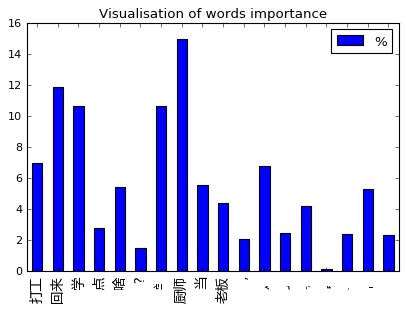

argmax_encode [[ 0.47745705  0.20898369  0.04420543  0.12686659  0.08502712  0.45987657
   0.04420543  0.16736093  0.10534291  0.11750972  0.04376618  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.47745705, 0.20898369, 0.044205435, 0.12686659, 0.085027121, 0.45987657, 0.044205435, 0.16736093, 0.10534291, 0.11750972, 0.043766178] 1.8806 11
水饺加盟,无需厨师,总部扶持创业!


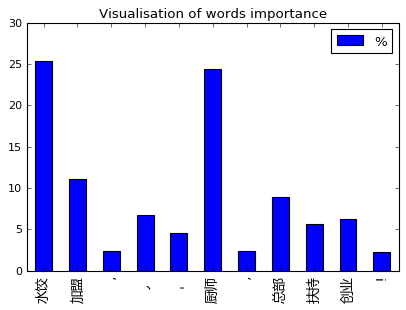

argmax_encode [[ 0.49353775  0.21617296  0.03696908  0.13199949  0.09850083  0.45750105
   0.03696908  0.18181193  0.12784597  0.12950546  0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[4214, 72, 7, 84, 168, 2193, 7, 1375, 990, 290, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.49353775, 0.21617296, 0.036969081, 0.13199949, 0.098500833, 0.45750105, 0.036969081, 0.18181193, 0.12784597, 0.12950546] 1.91081 10
水饺加盟,无需厨师,总部扶持创业


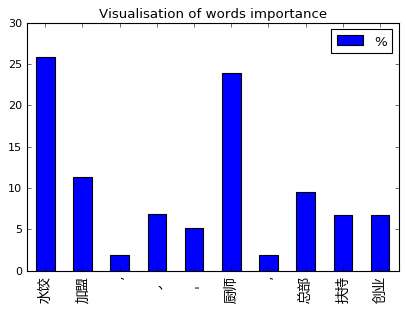

In [14]:
predict('打工回来学点啥?学厨师当老板,走到哪都不怕！')
predict('水饺加盟,无需厨师,总部扶持创业!')
predict('水饺加盟,无需厨师,总部扶持创业')

argmax_encode [[ 0.45295665  0.3237018   0.32349834  0.08928676  0.23073959  0.26183009
   0.00122618  0.1335614   0.14836377  0.14131978  0.42516977  0.08106492
   0.12772572  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[1434, 4062, 1992, 303, 29, 695, 115, 52, 676, 38, 1386, 9, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.45295665, 0.3237018, 0.32349834, 0.089286759, 0.23073959, 0.26183009, 0.0012261821, 0.1335614, 0.14836377, 0.14131978, 0.42516977, 0.081064917, 0.12772572] 2.74044 13
iPhone隐藏功能：高铁也能在线选座了！


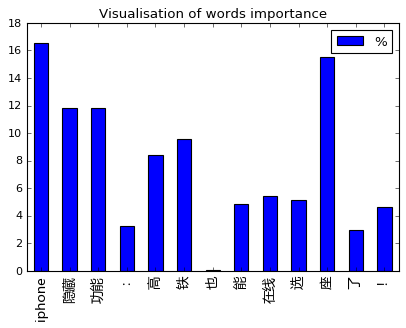

In [15]:
predict('iPhone隐藏功能：高铁也能在线选座了！')

In [16]:
predict('iPhone隐藏功能：高铁也能在线选座了！', 'iPhone')

[ 0.45295662]


array([ 0.45295662], dtype=float32)

In [17]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁')

[ 0.32654119]


array([ 0.32654119], dtype=float32)

In [18]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '选座')

[ 0.44184926]


array([ 0.44184926], dtype=float32)

In [19]:
predict('iPhone隐藏功能：高铁也能在线选座了！', '高铁选座')

[ 0.52601558]


array([ 0.52601558], dtype=float32)

argmax_encode [[ 0.28442848  0.23304008  0.09725799  0.49283108  0.2303111   0.2027771
   0.0962984   0.05756649  0.0921832   0.24949755  0.2027771   0.10755548
   0.15851754  0.24361864 -0.01009286  0.49283108  0.22891396  0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4447, 7542, 9634, 2835, 8124, 7, 9771, 3086, 5, 3612, 7, 136, 7808, 3254, 25, 2835, 5341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.28442848, 0.23304008, 0.097257994, 0.49283108, 0.2303111, 0.2027771, 0.096298397, 0.057566494, 0.092183203, 0.24949755, 0.2027771, 0.10755548, 0.15851754, 0.24361864, 0, 0.49283108, 0.22891396] 3.47040527314 

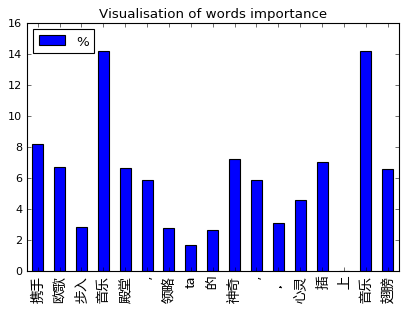

In [20]:
predict('携手欧歌步入音乐殿堂,领略ta的神奇,让心灵插上音乐翅膀')

argmax_encode [[ 0.32396287  0.79825968  0.21313821  0.22911744  0.22677752  0.17373616
   0.02987307  0.1851624  -0.01462475  0.1851624   0.79825968  0.17373616
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[8854, 2277, 583, 3581, 852, 197, 7, 11, 218, 11, 2277, 197, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.32396287, 0.79825968, 0.21313821, 0.22911744, 0.22677752, 0.17373616, 0.029873066, 0.1851624, 0, 0.1851624, 0.79825968, 0.17373616] 3.33718555421 12
巨人游泳五星级酒店培训,一对一游泳培训


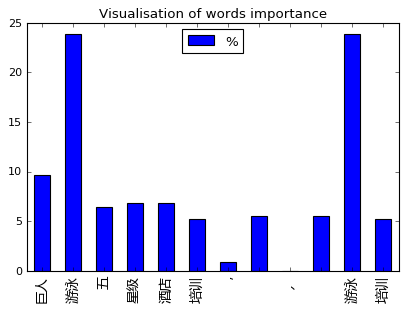

In [21]:
predict('巨人游泳五星级酒店培训,一对一游泳培训')

argmax_encode [[ 0.28453264  0.3633877   0.29711691  0.02565119  0.21765988  0.1753853
   0.28668535  0.11101072 -0.01727293  0.14944196  0.28175896  0.0689071
   0.20031859  0.19797674  0.22794342  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[4957, 820, 16428, 133, 101, 41, 272, 9, 7, 59, 2368, 15, 341, 56, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.28453264, 0.3633877, 0.29711691, 0.025651189, 0.21765988, 0.1753853, 0.28668535, 0.11101072, 0, 0.14944196, 0.28175896, 0.068907104, 0.20031859, 0.19797674, 0.22794342] 2.88777645119 15
往返飞旧金山?真是赚了,我一直在这里买!


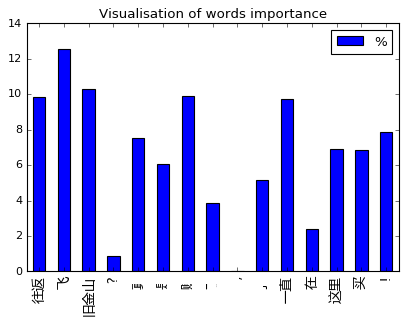

In [22]:
predict('往返飞旧金山?真是赚了,我一直在这里买!')

argmax_encode [[ 0.1359881   0.08783457  0.52941895  0.48728365  0.03659791  0.11722806
   0.04204438  0.53276771  0.14498317  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 852, 3, 341, 5, 5404, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.1359881, 0.087834574, 0.52941895, 0.48728365, 0.036597915, 0.11722806, 0.042044375, 0.53276771, 0.14498317] 2.11415 9
不要住酒店，这里的民宿好


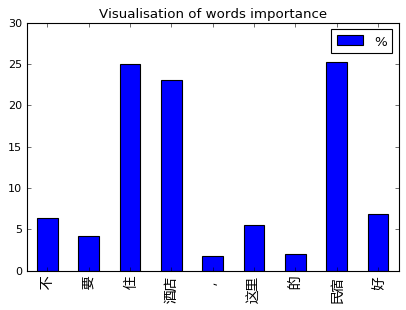

In [23]:
predict('不要住酒店，这里的民宿好')

argmax_encode [[ 0.13598806  0.08783458  0.52941895  0.53276765  0.03659793  0.11722805
   0.04204439  0.48728368  0.14498317  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]]
[8, 74, 626, 5404, 3, 341, 5, 852, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.13598806, 0.087834582, 0.52941895, 0.53276765, 0.03659793, 0.11722805, 0.04204439, 0.48728368, 0.14498317] 2.11415 9
不要住民宿，这里的酒店好


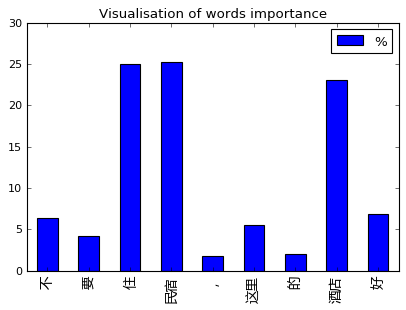

In [24]:
predict('不要住民宿，这里的酒店好')

argmax_encode [[ 0.26214343  0.04392383  0.35180485  0.35623735  0.36997056  0.06445151
   0.17668432  0.10480433  0.15492821  0.04878014  0.05182242  0.06445151
   0.19453977  0.05335964  0.07769851  0.27522266  0.2474903   0.04878014
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
[247, 189, 4845, 2881, 12429, 3, 417, 52, 175, 9, 401, 3, 1072, 174, 23, 6114, 556, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0.26214343, 0.043923829, 0.35180485, 0.35623735, 0.36997056, 0.064451508, 0.17668432, 0.10480433, 0.15492821, 0.048780143, 0.051822416, 0.064451508, 0.19453977, 0.053359635, 0.077698514, 0.27522266, 0.2474903

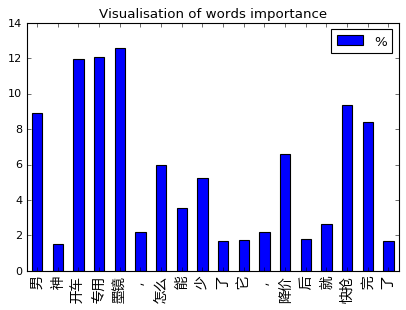

In [25]:
predict('男神开车专用墨镜，怎么能少了它，降价后就快抢完了')

argmax_encode [[-0.02910781  0.17917377  0.15500018  0.35725299  0.26888394  0.10416273
   0.21064697  0.10803603  0.06512494  0.28617787  0.17764036  0.17917377
   0.2478551   0.1497345   0.0699829   0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]]
[59, 5, 22092, 5705, 3781, 914, 326, 7, 38, 1262, 1553, 5, 12429, 343, 1826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
argmaxs [0, 0.17917377, 0.15500018, 0.35725299, 0.26888394, 0.10416273, 0.21064697, 0.10803603, 0.065124944, 0.28617787, 0.17764036, 0.17917377, 0.2478551, 0.1497345, 0.069982901] 2.55884605646 15
我的家乡惠州越来越热,选一款喜欢的墨镜很重要


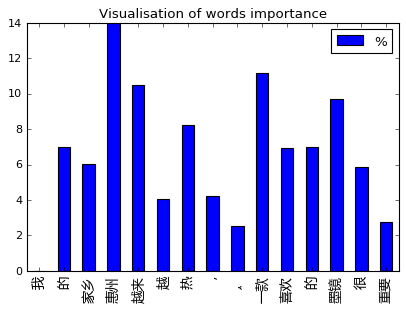

In [26]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

In [27]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '我的家乡惠州越来越热')

[ 0.6445272]


array([ 0.6445272], dtype=float32)

In [28]:
predict('选一款喜欢的墨镜很重要,我的家乡惠州越来越热', '选一款喜欢的墨镜很重要')

[ 0.586721]


array([ 0.586721], dtype=float32)

In [29]:
predict('我的家乡惠州越来越热,选一款喜欢的墨镜很重要', '选一款喜欢的墨镜很重要')

[ 0.58672094]


array([ 0.58672094], dtype=float32)

In [30]:
top_words('往返')

往返:1.000000 票价:0.320500 细数:0.308240 外汇:0.306990 1350:0.300733 金城:0.299503 把手:0.297348 新加坡:0.294330 偌大:0.292636 畅游:0.291920 鲨:0.287381 俄语:0.286832 投保:0.285422 格雷斯:0.285055 找乐:0.283598 预:0.283161 196:0.282651 买马:0.280559 艉:0.278840 温泉:0.277290 寨:0.274645 信达利:0.272827 岸:0.272514 10t:0.271572 时钟:0.271192 组成:0.269795 秀美:0.269213 二合一:0.268118 中关村:0.267227 自觉:0.266211 航线:0.263412 高尚:0.263144 海泽:0.262678 整天:0.261992 常开:0.261280 糯:0.260821 旗云:0.259166 错失:0.257764 三色:0.257498 犹:0.257419 木塑:0.256731 人造:0.255472 239:0.254071 110:0.253862 佛像:0.253628 竞猜:0.253257 亲爱:0.252678 播音:0.251136 瑞普:0.250622 渠:0.250178 严查:0.249196 锂:0.249134 顶层:0.248663 惹:0.248177 收楼:0.248159 鋒:0.247608 唐僧:0.247552 评委:0.247206 难找:0.246874 央:0.246438 指示:0.245877 te:0.245873 2216:0.245636 柬埔寨:0.244200 磁材:0.243715 阶:0.243144 波兰:0.242696 爱帝:0.242484 画院:0.241931 7p:0.241613 住在:0.241537 塞浦路斯:0.241458 ф:0.240783 膳:0.240568 早:0.240566 限时:0.239755 960:0.239624 安通:0.239536 惊叹:0.239466 商丘:0.239346 异国:0.239211 午夜:0.238930 轮式:0.238439 旅游:

In [31]:
top_words('民宿')

民宿:1.000000 城内:0.311257 altea:0.308617 冰晶:0.305247 箔:0.304353 嘉峪:0.303258 客房:0.299527 艳遇:0.296183 三十一:0.295965 雅丽:0.295720 roy:0.293169 雅庭:0.292011 蚊虫:0.287372 屹立:0.287282 臣:0.286479 汇思:0.283029 客栈:0.281439 她来:0.281315 选房:0.280377 醒:0.279989 新颜:0.279637 傻瓜:0.277439 印尼:0.277006 免交:0.276806 围城:0.276550 曲阜:0.274331 转弯:0.272200 瀑:0.271958 画笔:0.270873 开叉:0.270282 蓝宝:0.270249 填写:0.269826 避暑:0.269590 含:0.269485 阴凉:0.269453 静安:0.266764 软肋:0.266713 当地:0.266428 副本:0.265792 墓园:0.264725 公大:0.264026 学力:0.263526 婉:0.263074 义务:0.262366 西昌:0.262105 精髓:0.261939 驴友:0.261907 青釉:0.261408 承保:0.261138 雨蓬:0.261119 奈何:0.260451 出名:0.259980 爷:0.259663 住在:0.259340 隔层:0.259317 医护:0.258497 执行:0.257322 防晒:0.257254 归国:0.256987 翱翔:0.255919 胡同:0.255372 大火:0.255232 沧州:0.255020 如来:0.254694 咏春:0.254641 初稿:0.254424 取胜:0.254087 码垛:0.254020 熊:0.253637 江湾:0.253477 目录:0.252859 饱满:0.252407 雪依氏:0.252381 桔子:0.251711 闻名:0.251699 德玛:0.250816 墓地:0.249602 袂:0.248620 谢:0.248125 造船:0.248053 皇家:0.247383 乱真:0.247022 中断:0.246982 异军:0.246

In [32]:
top_words('酒店')

酒店:1.000000 宾馆:0.305075 吃好:0.293442 自力:0.271139 齐聚:0.270048 影吧:0.261688 辨别:0.261193 大城:0.257399 通电:0.257254 选拔:0.257155 展台:0.253993 020:0.253771 富邦:0.251447 拍档:0.251269 废话:0.249969 始:0.249296 中教:0.247745 舒达:0.247089 瞰:0.246432 益丰:0.245209 粮库:0.243555 迭:0.242944 客房:0.241805 易观:0.240893 灞河:0.237498 香醇:0.237311 纳加:0.236724 同里:0.236563 三好:0.234926 238:0.234630 ≠:0.232853 博源:0.230591 摇号:0.230089 歌声:0.229611 订房:0.227868 竟能:0.227603 天福:0.227415 海选:0.226735 卧室:0.225722 五绝:0.225028 bopp:0.224989 尽快:0.224666 谨:0.224613 逃离:0.224473 火花:0.224312 景美:0.224237 苏杭:0.224170 r级:0.224054 桑拿:0.222832 足浴:0.222224 上人:0.221684 破浪:0.221660 水床:0.221287 捆扎:0.220945 软包:0.220856 秦汉:0.220761 淌:0.218757 太行:0.218388 公主:0.218055 翊:0.217741 医用:0.217685 通力:0.217508 和美:0.217303 大豪:0.217114 加香:0.216983 3800:0.216561 公园:0.216126 尧:0.215922 重听:0.215777 转弯:0.215499 佐敦:0.215161 刮痧:0.213862 喷墨:0.213743 闪亮:0.213400 7207:0.212618 构:0.212537 诺瑞:0.212134 南洋:0.211966 中亚:0.211879 锅贴:0.211862 热火:0.211371 耗:0.211077 水饺:0.211043 da:0.2

In [33]:
top_words('旧金山')

旧金山:1.000000 情迷:0.562455 me:0.391975 博通:0.385613 采暖:0.352843 2888:0.352717 mvr:0.352698 面漆:0.347294 清真:0.346373 主笔:0.344319 加州:0.342762 立柱:0.341349 亚运:0.340503 沿线:0.340094 爵士:0.338445 商行:0.335961 良:0.335570 海运:0.332943 泰和:0.332900 亮剑:0.330561 票价:0.328757 猫网:0.328493 下图:0.326666 接货:0.326111 部曲:0.323539 末世:0.320098 编写:0.320093 浇筑:0.319169 1700:0.317699 夜景:0.317423 宏亚:0.315994 排放:0.315761 品鉴:0.313705 创联:0.313591 打响:0.312110 完毕:0.311979 通路:0.311821 华星:0.310476 黄岛:0.309503 蛋:0.307689 灯具:0.306945 halal:0.303281 挑灯:0.302538 拌:0.301733 古城:0.301646 动辄:0.300619 61:0.299696 明智:0.299360 专心:0.298124 卖出:0.296566 海龟:0.296422 快运:0.296383 汉白玉:0.295350 洛杉矶:0.294091 瑙:0.293180 就此:0.292899 祖:0.291704 荣誉:0.291018 笈:0.290740 中科院:0.290668 试点:0.290338 靴:0.289930 环游:0.289760 绿地:0.289233 科艺:0.289149 火光:0.289071 全天:0.288098 接地:0.287699 中关村:0.287532 力天:0.287237 浓浓:0.286980 福州:0.286906 广汽:0.286193 楼:0.285226 讲解:0.285204 天号:0.284915 非洲:0.284452 甲方:0.284348 bang:0.283955 入伙:0.283579 以求:0.283003 俄罗斯:0.282856 臻品:0.282

In [34]:
top_words('我的家乡惠州越来越热,选一款喜欢的墨镜很重要')

惠州:0.357253 一款:0.286178 越来:0.268884 墨镜:0.247855 偏光:0.238899 磁芯:0.221356 羟丙:0.214359 热:0.210647 售票:0.208327 瑞普:0.202168 奥达:0.196687 阶段:0.195905 活期:0.194334 朴树:0.193456 抽象:0.191361 可取:0.189664 眼镜:0.187077 人气:0.186538 政法:0.186488 杨浦:0.185471 一觉:0.183579 金久卓尔:0.182942 经理:0.182927 阜:0.182067 五月:0.180171 的:0.179174 库伯:0.178870 喜欢:0.177640 助剂:0.177270 焖饭:0.177089 江华:0.176187 皮具:0.174626 镜框:0.174207 雀舌:0.174082 吸盘:0.174058 三套:0.172151 防锈:0.171740 多款:0.171610 介意:0.171601 20000:0.171378 残局:0.170500 甲基:0.170023 标致:0.169423 新东方:0.169129 耽误:0.168973 凶:0.168971 次性:0.168789 太平洋:0.167769 拉带:0.167659 顺路:0.166841 type:0.166355 稀缺:0.166205 凿井:0.166155 退货:0.166086 液:0.165466 避震:0.165283 萝:0.165280 源:0.165210 剂:0.164976 微粉:0.164694 秀:0.164147 弯管:0.163769 全身:0.163466 燃煤:0.162941 米修:0.162649 榨:0.162384 坚定:0.161883 排气:0.161799 限量:0.161054 纶:0.160897 擀:0.160448 即刻:0.160231 －:0.160138 麻花:0.160056 时光:0.159287 宿舍:0.158808 安家:0.158679 柔软:0.157317 计数:0.157244 药材:0.156849 对比:0.156484 大概:0.156467 坚持:0.156338 五险:0.156

In [35]:
top_words('眼镜')

眼镜:1.000000 墨镜:0.476445 偏光:0.412489 镜框:0.402301 滑:0.356504 足金:0.330802 古风:0.325785 视力:0.322654 镜架:0.320422 整形:0.311920 脱贫:0.310527 地域:0.291351 288:0.279525 白白:0.279066 猴:0.278528 锌:0.277850 镜片:0.277264 分级:0.276274 逸:0.272546 打死:0.271974 f1:0.271135 白兰地:0.270611 育婴:0.268265 超薄:0.268228 人们:0.267833 找准:0.267365 方面:0.266749 8m:0.266035 爱贝:0.265805 co:0.264901 井中:0.262938 二十二:0.262139 回调:0.262121 卤水:0.261776 斗牛:0.260520 附赠:0.259519 奇葩:0.259393 多色:0.257405 倒退:0.255954 嗖:0.254259 八字:0.253853 卜:0.253476 装出:0.253009 留神:0.252661 穗:0.252359 熟练:0.251432 兰:0.249694 寓意:0.249293 此生:0.248906 重疾:0.247393 要靠:0.246561 话说:0.246314 捷径:0.245527 淡化:0.244500 免受:0.244235 副:0.244129 稿:0.244114 皱:0.242152 乐乐:0.240671 窝:0.240519 舱:0.240491 直邮:0.239707 件件:0.239499 酒仙:0.239396 瘀:0.238776 绝活:0.238764 米酷:0.238302 侠客:0.238074 科森:0.238071 华强北:0.237946 吃药:0.237870 橡木:0.237864 病虫:0.237488 喷枪:0.237416 初稿:0.237374 作文:0.237336 欠款:0.237182 因:0.236488 白骨精:0.236156 久经:0.234597 拖:0.233539 遭殃:0.233312 近视:0.232541 且看:0.232383 前列: